In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import numpy as np

import scipy.cluster.hierarchy as shc

from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_moons

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from sklearn.decomposition import PCA

from sklearn import datasets

%matplotlib inline
pd.set_option("display.max_columns", None)

# Lab 24 - Simulated clusters

The following code will create 3 clusters in 3-dimensional space using 100 data points.  The coordinates of the data points are given in X and which cluster they belong to is given in y.

In [2]:
X, y = make_blobs(n_samples=100, centers=3, n_features=3)

Display X.

In [3]:
X

array([[  3.8255834 , -10.16563119,   2.77051423],
       [  2.24373112, -10.59809887,   1.41148125],
       [ 10.41884767,   5.17670494,   7.86923758],
       [  0.91659934,  -9.80578092,   1.66217889],
       [  6.04314065,  -2.18524613,   1.62938247],
       [  0.48624047, -10.88772576,   3.17590115],
       [ 10.06702466,   5.86130563,   9.10394328],
       [  1.92052099,  -9.6337989 ,   2.74497478],
       [  3.84406565,  -9.34399272,   1.98992597],
       [  2.81469309,  -3.03269407,   3.56301577],
       [  6.33279913,  -1.39067544,   4.63443165],
       [  6.93511382,  -2.62506984,   3.32863717],
       [  2.72878243, -10.58964177,   1.70581471],
       [ 10.84957097,   5.73620818,   7.58990916],
       [ 10.49292426,   6.44847434,   6.06113941],
       [  4.94016526,  -1.81701567,   4.37861062],
       [  3.69199272,  -0.77728142,   3.63049551],
       [  3.59534078, -10.2993718 ,   2.25302926],
       [  0.09826702,  -9.28974676,   1.78598465],
       [  4.62653013,  -2.38116

Display y.

In [4]:
y

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 0, 1, 0,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 0,
       1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       0, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2])

Visualize the clusters in 2 dimensions using PCA.  First create a PCA object and find the new X coordinatese in 2 dimensions.

In [5]:
pca = PCA(n_components=2)
pca.fit(X)
X_rotated = pca.transform(X)

Create a new dataframe containing the new X coordinates and a column with the cluster number.

In [8]:
X_rotated_df = pd.DataFrame(X_rotated, columns = ["PC1","PC2"])
X_rotated_df["cluster"] = y
X_rotated_df.head()

,PC1,PC2,cluster
0,-8.629208,-1.784229,1
1,-10.098456,-0.338461,1
2,8.799408,-0.780163,2
3,-9.892453,0.331062,1
4,-1.314898,2.192864,0


Use a scatter plot to visualize the cluster in 2 dimensions.

(-10, 10)

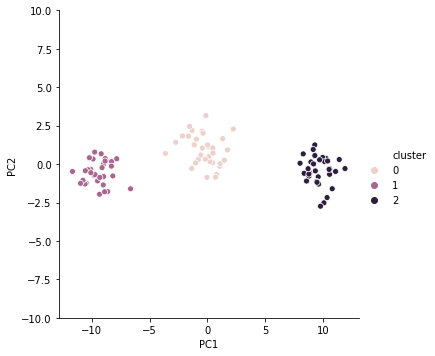

In [28]:
sns.relplot(x = "PC1", y = "PC2", hue = "cluster", data = X_rotated_df)

plt.ylim(-10, 10)

Run k-means clustering to predict the clusters.

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_clusters = kmeans.fit_predict(X)
kmeans_clusters

array([2, 1, 3, 2, 2, 1, 2, 0, 3, 2, 3, 0, 0, 2, 1, 2, 2, 1, 2, 3, 1, 0,
       0, 0, 1, 2, 2, 1, 0, 0, 3, 1, 2, 3, 3, 2, 3, 2, 1, 1, 2, 3, 1, 1,
       3, 2, 2, 1, 3, 2, 1, 0, 0, 1, 0, 0, 2, 3, 3, 0, 2, 1, 3, 2, 3, 0,
       3, 3, 1, 3, 1, 3, 3, 2, 3, 1, 0, 2, 3, 0, 3, 3, 2, 3, 3, 2, 3, 1,
       2, 0, 0, 2, 2, 0, 1, 2, 1, 2, 0, 1])

Store the predicted cluster in the dataframe you created.

In [25]:
X_rotated_df["kmeans_clusters"] = kmeans_clusters

Compute the confusion matrix between the actual and predicted values.  How accurate was k-means?

In [26]:
confusion_matrix(X_rotated_df["kmeans_clusters"], X_rotated_df["cluster"])

array([[ 6,  7,  7,  0],
       [ 4,  9, 10,  0],
       [12, 10,  8,  0],
       [12,  7,  8,  0]], dtype=int64)

__(6 + 9 + 8 + 0) / (6 + 7 + 7 + 4 + 9 + 10 + 12 + 10 + 8 + 12 + 7 + 8) = 23 / 100 = 23%__

What happens to the above analysis as you increase the number of features?

What happens to the above analysis if you use 3 features, but increase the number of clusters?

What happens if you increase both the number of features and the number of clusters?

The following method also simulates data.  What kind of data is it?  Hint: try looking at the data and plotting it

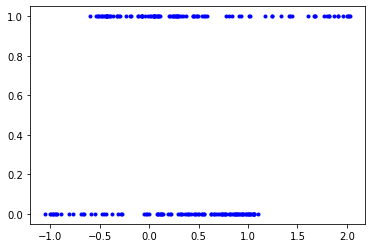

In [23]:
X, y = make_moons(noise = 0.05)

plt.plot(X, y, '.b')
# must be categorical data

Run k-means clustering to predict clusters.

In [29]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_clusters = kmeans.fit_predict(X)
kmeans_clusters

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0])

How accurate is k-means cluster on this dataset?

In [30]:
confusion_matrix(y, kmeans_clusters)


# (35 + 38) / (35 + 38 + 12 + 15) = 73 / 100 = 73%

array([[35, 15],
       [12, 38]], dtype=int64)

What happens to the accuracy if you increase the noise parameter?

In [33]:
X, y = make_moons(noise = 0.20)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_clusters = kmeans.fit_predict(X)
kmeans_clusters

confusion_matrix(y, kmeans_clusters)


# (37 + 42) / (37 + 42 + 13 + 8) = 79 / 100 = 79%
# the acurracy improves

array([[37, 13],
       [ 8, 42]], dtype=int64)

How does hierarchical clustering perform on the above data sets? 

In [35]:
X, y = make_moons(noise = 0.05)

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
clusters = cluster.fit_predict(X)
clusters

confusion_matrix(y, clusters)

# 17%, hierarchial clustering performs worse on the above datset

array([[17, 33],
       [50,  0]], dtype=int64)

There is also a `make_circles()` function.  What does it do?  The documentation is [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles)